# 💡 Project Title: Student Performance Prediction Based on Study Habits

### 📘 Problem Statement:
    Predict whether a student will pass or fail an exam based on their study habits and lifestyle choices using logistic regression

# Importing Libraries

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import joblib

# Loading Dataset

In [17]:
df = pd.read_csv("Students_Performance.csv")  
df.head()

,Student_ID,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,STUDENT1,19-22,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,STUDENT2,19-22,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,STUDENT3,19-22,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,STUDENT4,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,STUDENT5,19-22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


# Exploratory Data Analysis

In [20]:
df.shape

(145, 15)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Student_ID          145 non-null    object
 1   Student_Age         145 non-null    object
 2   Sex                 145 non-null    object
 3   High_School_Type    145 non-null    object
 4   Scholarship         144 non-null    object
 5   Additional_Work     145 non-null    object
 6   Sports_activity     145 non-null    object
 7   Transportation      145 non-null    object
 8   Weekly_Study_Hours  145 non-null    int64 
 9   Attendance          145 non-null    object
 10  Reading             145 non-null    object
 11  Notes               145 non-null    object
 12  Listening_in_Class  145 non-null    object
 13  Project_work        145 non-null    object
 14  Grade               145 non-null    object
dtypes: int64(1), object(14)
memory usage: 17.1+ KB


In [26]:
df.describe()

,Weekly_Study_Hours
count,145.000000
mean,2.331034
std,4.249273
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,12.000000


In [36]:
df.isnull().sum()

Student_ID            0
Student_Age           0
Sex                   0
High_School_Type      0
Scholarship           0
Additional_Work       0
Sports_activity       0
Transportation        0
Weekly_Study_Hours    0
Attendance            0
Reading               0
Notes                 0
Listening_in_Class    0
Project_work          0
Grade                 0
dtype: int64

In [34]:
df.dropna(inplace=True)

In [32]:
df['Grade'].value_counts()

Grade
AA      35
BA      24
BB      21
CC      17
DD      17
DC      13
CB      10
Fail     8
Name: count, dtype: int64

# Data Visualization

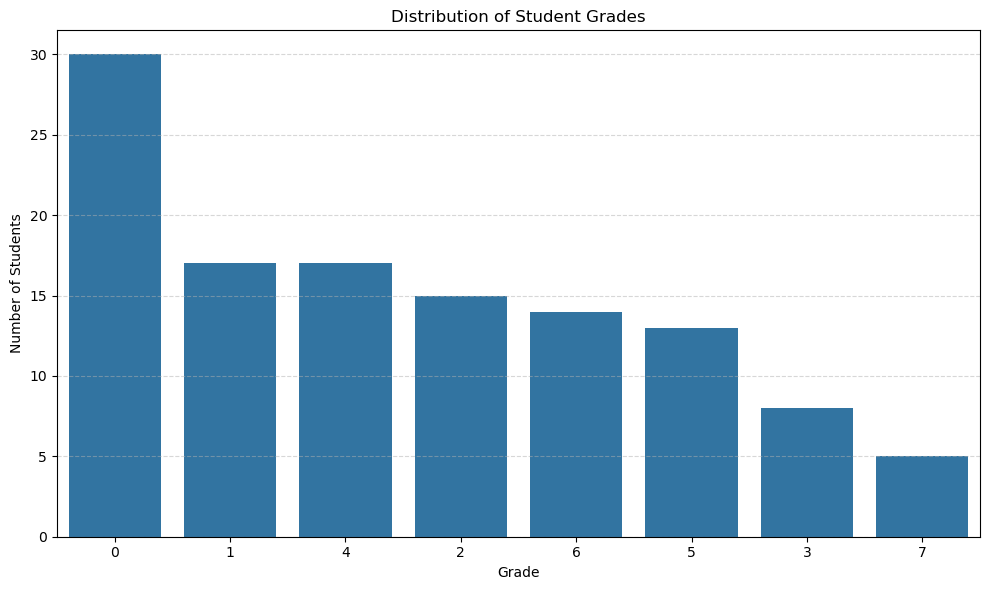

In [228]:
# Visualization of gardes with students
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Grade', order=df['Grade'].value_counts().index)
plt.title('Distribution of Student Grades')
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

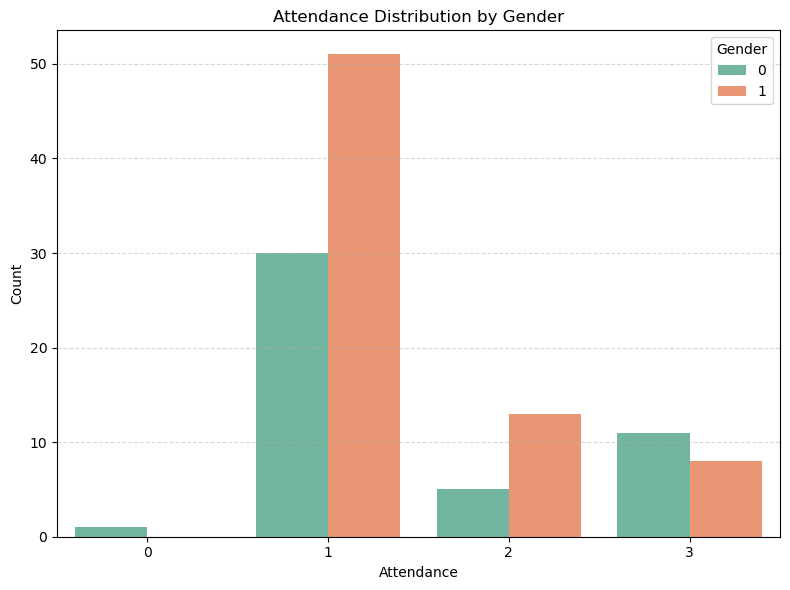

In [226]:
# Plot attendance grouped by gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Attendance', hue='Sex', palette='Set2')
plt.title('Attendance Distribution by Gender')
plt.xlabel('Attendance')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

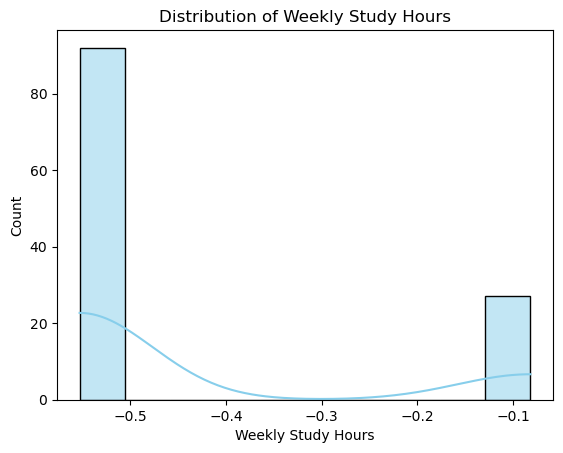

In [230]:
# Histograph 
sns.histplot(df['Weekly_Study_Hours'], kde=True, bins=10, color='skyblue')
plt.title("Distribution of Weekly Study Hours")
plt.xlabel("Weekly Study Hours")
plt.show()

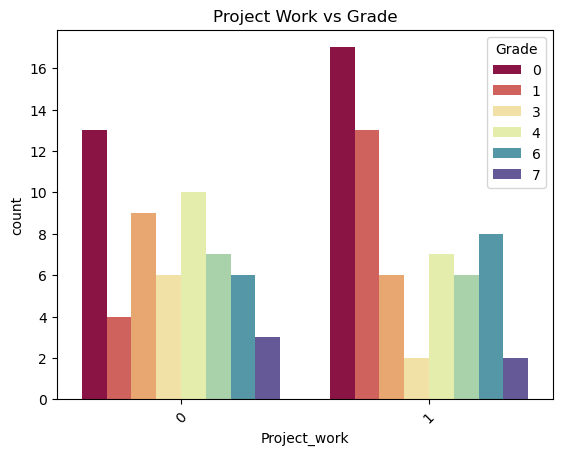

In [232]:
# Grade vs Project work
sns.countplot(data=df, x='Project_work', hue='Grade', palette='Spectral')
plt.title("Project Work vs Grade")
plt.xticks(rotation=45)
plt.show()

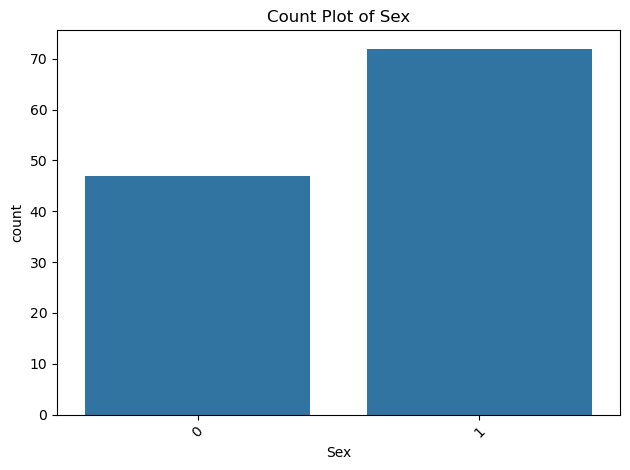

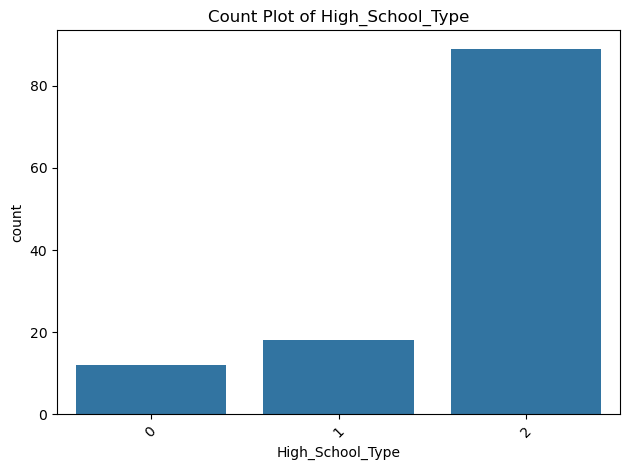

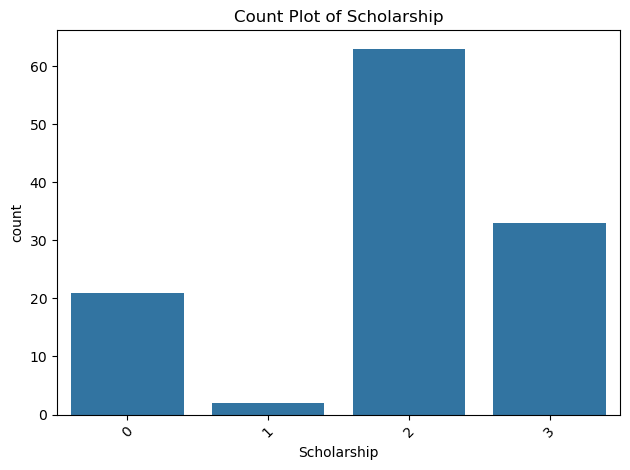

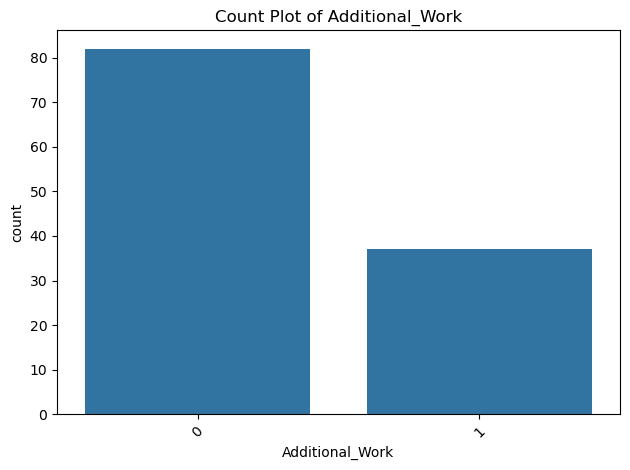

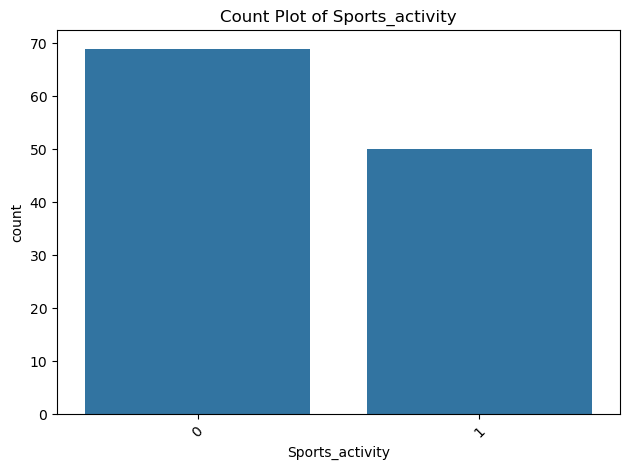

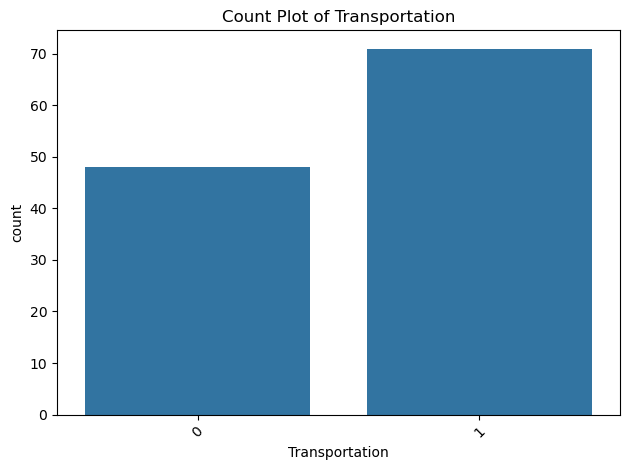

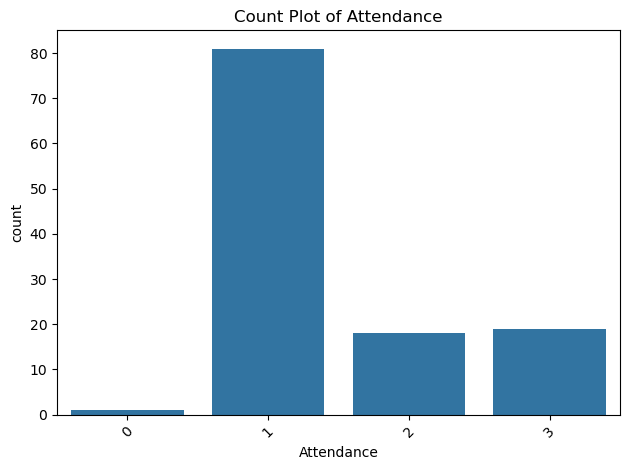

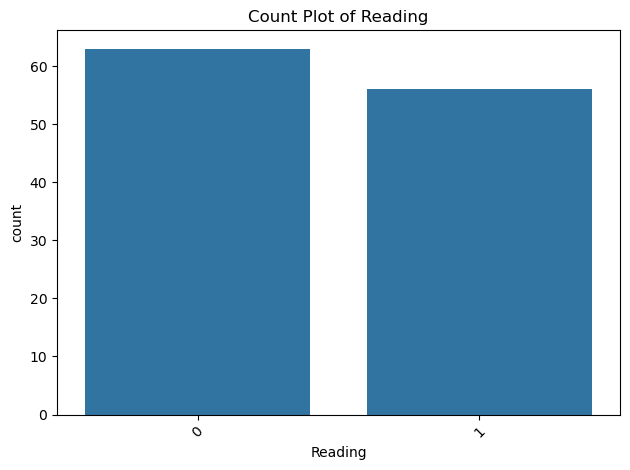

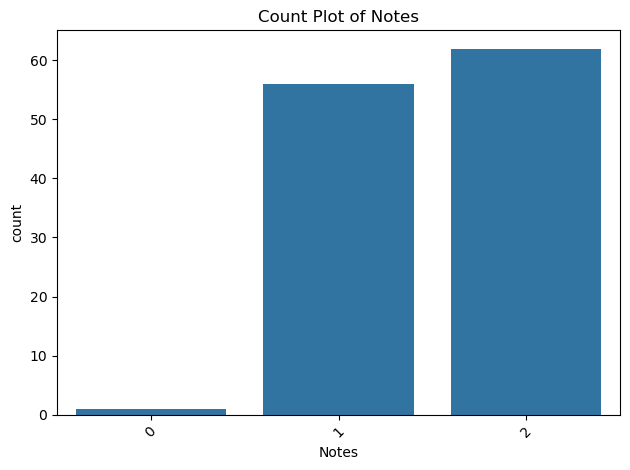

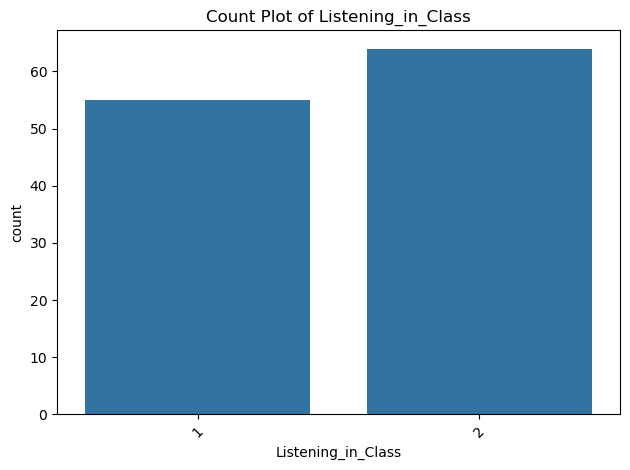

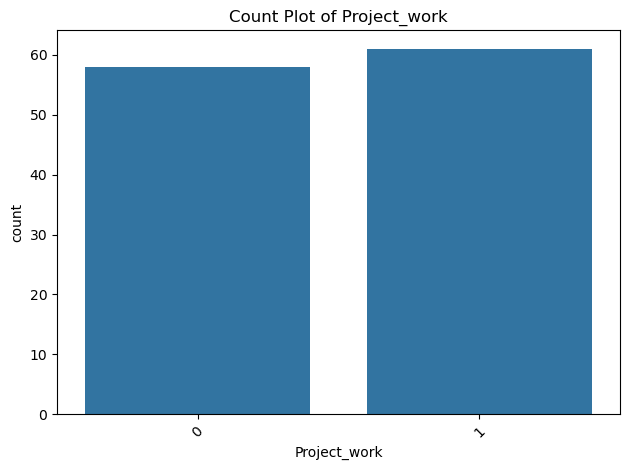

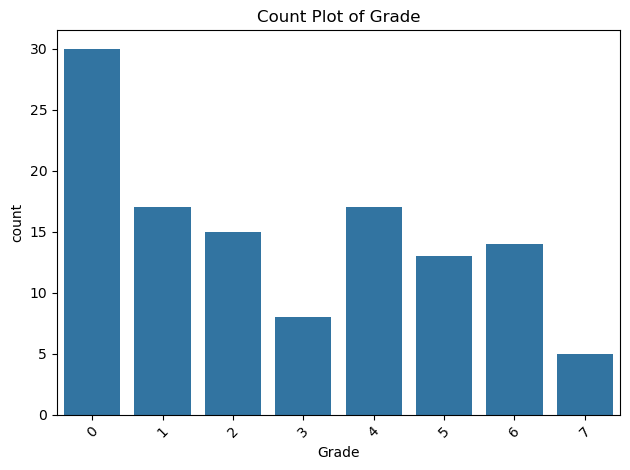

In [236]:
# Count plot for categorical features
categorical_cols = ['Sex', 'High_School_Type', 'Scholarship', 'Additional_Work',
                    'Sports_activity', 'Transportation', 'Attendance',
                    'Reading', 'Notes', 'Listening_in_Class', 'Project_work', 'Grade']

for col in categorical_cols:
    sns.countplot(data=df, x=col)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Data Preprocessing

In [52]:
df.isnull().sum()

Student_ID            0
Student_Age           0
Sex                   0
High_School_Type      0
Scholarship           0
Additional_Work       0
Sports_activity       0
Transportation        0
Weekly_Study_Hours    0
Attendance            0
Reading               0
Notes                 0
Listening_in_Class    0
Project_work          0
Grade                 0
dtype: int64

In [54]:
# Removing unnecessay column
df.drop('Student_ID', axis=1, inplace=True)

In [56]:
df

,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,19-22,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,19-22,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,19-22,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA
3,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,19-22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,19-22,Female,State,50%,Yes,Yes,Private,0,Always,No,Yes,No,Yes,CC
141,18,Female,State,75%,No,No,Private,0,Never,No,Yes,Yes,No,CC
142,18,Female,Private,75%,No,No,Private,0,Always,Yes,No,No,No,AA
143,19-22,Female,State,75%,Yes,Yes,Bus,12,Sometimes,No,Yes,No,Yes,CB


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, 0 to 142
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Student_Age         119 non-null    float64
 1   Sex                 119 non-null    int32  
 2   High_School_Type    119 non-null    int32  
 3   Scholarship         119 non-null    int32  
 4   Additional_Work     119 non-null    int32  
 5   Sports_activity     119 non-null    int32  
 6   Transportation      119 non-null    int32  
 7   Weekly_Study_Hours  119 non-null    float64
 8   Attendance          119 non-null    int32  
 9   Reading             119 non-null    int32  
 10  Notes               119 non-null    int32  
 11  Listening_in_Class  119 non-null    int32  
 12  Project_work        119 non-null    int32  
 13  Grade               119 non-null    int32  
dtypes: float64(2), int32(12)
memory usage: 8.4 KB


In [240]:
# Convert datatype
df['Student_Age'] = pd.to_numeric(df['Student_Age'], errors='coerce')

In [242]:
df.dtypes

Student_Age           float64
Sex                     int32
High_School_Type        int32
Scholarship             int32
Additional_Work         int32
Sports_activity         int32
Transportation          int32
Weekly_Study_Hours    float64
Attendance              int32
Reading                 int32
Notes                   int32
Listening_in_Class      int32
Project_work            int32
Grade                   int32
dtype: object

### Encoding

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_columns = ['Sex', 'High_School_Type', 'Scholarship', 'Additional_Work',
                       'Sports_activity', 'Transportation', 'Attendance',
                       'Reading', 'Notes', 'Listening_in_Class', 'Project_work', 'Grade']

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

### Feature Scaling

In [244]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Student_Age'] = scaler.fit_transform(df[['Student_Age']])
df['Weekly_Study_Hours'] = scaler.fit_transform(df[['Weekly_Study_Hours']])

### Handling Outlier

In [246]:
# Before removing outliers
print("Original shape:", df.shape)

# Detect outliers using IQR on 'Weekly_Study_Hours'
Q1 = df['Weekly_Study_Hours'].quantile(0.25)
Q3 = df['Weekly_Study_Hours'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_df = df[(df['Weekly_Study_Hours'] >= lower_bound) & (df['Weekly_Study_Hours'] <= upper_bound)]
print("New shape after removing outliers:", filtered_df.shape)
print("Outliers removed:", df.shape[0] - filtered_df.shape[0])


Original shape: (119, 14)
New shape after removing outliers: (92, 14)
Outliers removed: 27


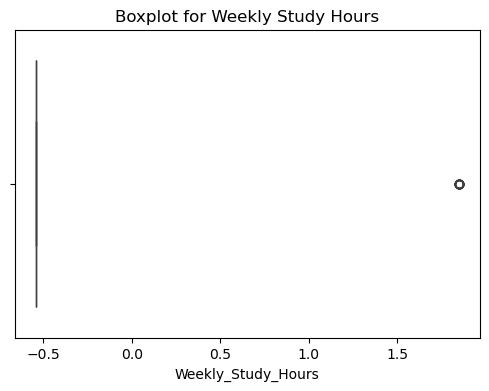

In [248]:
# Boxplot for outlier
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Weekly_Study_Hours'])
plt.title("Boxplot for Weekly Study Hours")
plt.show()

# Feature Selection

In [111]:
X = df.drop('Grade', axis=1)
y = df['Grade']

### Train Test Split

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection and Prediction

In [250]:
# Initializing Logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\DC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [252]:
# Predict on test data
y_pred_log = logreg.predict(X_test)

In [254]:
y_pred_log

array([4, 0, 1, 4, 0, 5, 6, 0, 0, 4, 2, 1, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0,
       3, 0])

# Model Evaluation - Performance metrices

In [256]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(" Accuracy:", accuracy_score(y_test, y_pred_log))
print(" Precision:", precision_score(y_test, y_pred_log, average='weighted'))
print(" Recall:", recall_score(y_test, y_pred_log, average='weighted'))

 Accuracy: 0.2916666666666667
 Precision: 0.2569444444444444
 Recall: 0.2916666666666667


### Confusion matrix

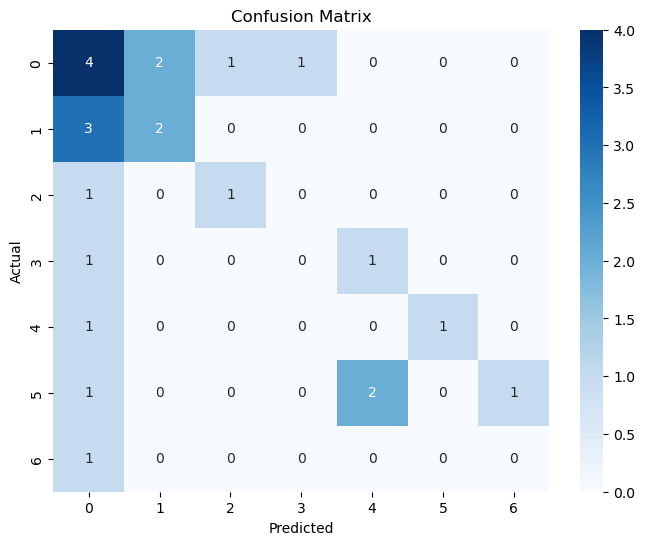

In [260]:
# Visualization using confusion matrix
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Saving the trained model

In [262]:
# Saving trained model
joblib.dump(logreg, 'logistic_regression_model.pkl')
print("Logistic Regression model saved as 'logistic_regression_model.pkl'")

Logistic Regression model saved as 'logistic_regression_model.pkl'


# Experimentaion with RandomForestClassifier

In [264]:
from sklearn.ensemble import RandomForestClassifier
# Initialize rfc
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [266]:
# Predict on test data
y_pred_rf = rf_clf.predict(X_test)

In [212]:
y_pred_rf

array([2, 0, 1, 0, 0, 5, 1, 0, 0, 4, 2, 1, 0, 4, 0, 1, 3, 0, 0, 0, 0, 0,
       0, 0])

In [272]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))

Accuracy: 0.375
Precision: 0.2886904761904762
Recall: 0.375


C:\Users\DC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [274]:
import joblib

# Save the model
joblib.dump(rf_clf, 'random_forest_model.pkl')
print(" Random Forest model saved as 'random_forest_model.pkl'")

 Random Forest model saved as 'random_forest_model.pkl'


# Comparision of two models

In [276]:
# Accuracy
acc_lr = accuracy_score(y_test, y_pred_log)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Precision
prec_lr = precision_score(y_test, y_pred_log, average='weighted')
prec_rf = precision_score(y_test, y_pred_rf, average='weighted')

# Recall
recall_lr = recall_score(y_test, y_pred_log, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')


# Display comparison
print("📊 Model Performance Comparison:\n")
print(f"Logistic Regression - Accuracy: {acc_lr:.4f}, Precision: {prec_lr:.4f}, Recall: {recall_lr:.4f}")
print(f"Random Forest       - Accuracy: {acc_rf:.4f}, Precision: {prec_rf:.4f}, Recall: {recall_rf:.4f}")


📊 Model Performance Comparison:

Logistic Regression - Accuracy: 0.2917, Precision: 0.2569, Recall: 0.2917
Random Forest       - Accuracy: 0.3750, Precision: 0.2887, Recall: 0.3750


C:\Users\DC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


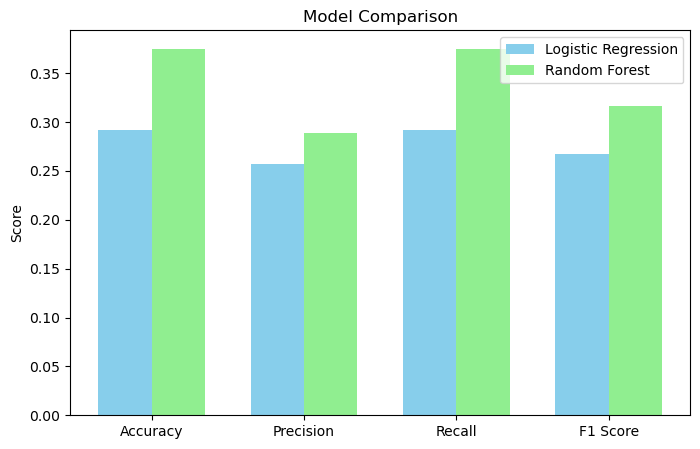

In [278]:
# Labels and scores
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
lr = [acc_lr, prec_lr, recall_lr, f1_lr]
rf = [acc_rf, prec_rf, recall_rf, f1_rf]

x = np.arange(len(labels))
width = 0.35

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, lr, width, label='Logistic Regression', color='skyblue')
plt.bar(x + width/2, rf, width, label='Random Forest', color='lightgreen')

# Labels
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks(x, labels)
plt.legend()

plt.show()

#### Observation
##### Logistic Regression is better when you want a simpler, faster, and more interpretable model.
##### Random Forest usually wins in accuracy and robustness, especially with complex patterns and non-linear relationships.